In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
mnist

<module 'tensorflow.python.keras.api._v1.keras.datasets.mnist' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v1\\keras\\datasets\\mnist\\__init__.py'>

# 2 tuples seperated by comma = mnist.load_data()

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
x_train.shape #shape is not a function

(60000, 28, 28)

In [12]:
x_train[0].shape

(28, 28)

# Lets scale

In [19]:
x_train = x_train/255
x_test = x_test/255

# Building model

In [20]:
model = Sequential()
model.add(LSTM(128, input_shape = (x_train.shape[1:]), activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation = 'softmax'))

opt = tf.keras.optimizers.Adam(lr = 1e-3, decay = 1e-5)


model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 119s 2ms/sample - loss: 0.6970 - acc: 0.7647 - val_loss: 0.1534 - val_acc: 0.9521
Epoch 2/3
60000/60000 [==============================] - 151s 3ms/sample - loss: 0.1733 - acc: 0.9534 - val_loss: 0.1484 - val_acc: 0.9581
Epoch 3/3
60000/60000 [==============================] - 154s 3ms/sample - loss: 0.1193 - acc: 0.9680 - val_loss: 0.0736 - val_acc: 0.9750


9


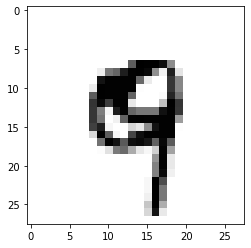

In [34]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28, 28))
print(pred.argmax())

In [35]:
print(pred.argmax())

9
